In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
try:
    plt.style.use('paper')
except:
    print("plot style not found")

In [79]:
year = '2015'
pool = 944
# Name Paid in Paid out
syns = [['Jeff', 171, 116.11], ['Mason', 206, 147.26], ['Robbie', 241, 304.44], ['Prasad', 181, 239.30], ('Raj', 145, 136.88)]

In [80]:
simtourneys = np.load('data/'+year+'simtourneys.npy')

In [81]:
holdings = [np.load('data/'+year+syn[0]+'.npy') for syn in syns]

In [82]:
%%time
simresults = [np.dot(simtourneys, holding) for holding in holdings]

CPU times: user 1.68 s, sys: 116 ms, total: 1.8 s
Wall time: 86.7 ms


data/2015Jeff.npy
Mean=-16.82. 10/30/50/70/90th percentile: ['-79.43', '-52.06', '-27.51', '3.64', '63.11']
data/2015Mason.npy
Mean=35.63. 10/30/50/70/90th percentile: ['-80.45', '-20.98', '30.94', '81.92', '161.22']
data/2015Robbie.npy
Mean=-29.68. 10/30/50/70/90th percentile: ['-119.70', '-69.19', '-30.96', '7.74', '63.44']
data/2015Prasad.npy
Mean=-2.20. 10/30/50/70/90th percentile: ['-76.69', '-35.62', '-3.53', '27.15', '72.46']
data/2015Raj.npy
Mean=13.06. 10/30/50/70/90th percentile: ['-60.98', '-27.94', '2.74', '39.08', '104.22']


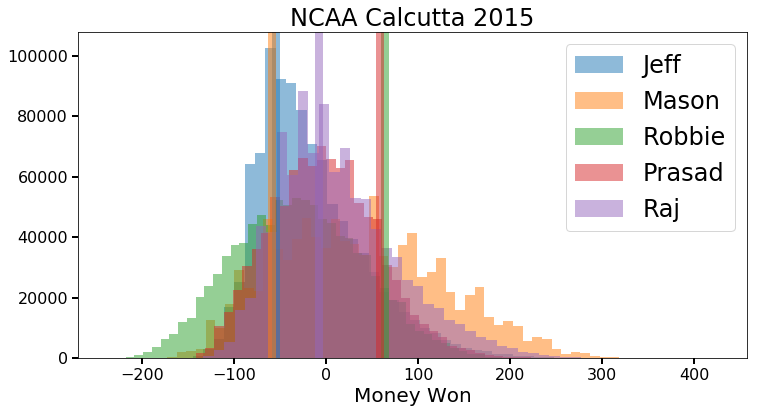

In [83]:
fig, ax = plt.subplots(figsize=(12,6))
for syn, paidin, paidout in syns:
    print('data/'+year+syn+'.npy')
    holdings = np.load('data/'+year+syn+'.npy')
    simresults = np.dot(simtourneys, holdings)
    values, bins, patches = ax.hist(simresults*pool-paidin, bins=50, label=syn, alpha=0.5)
    print("Mean={0:.2f}. 10/30/50/70/90th percentile:".format(simresults.mean()*pool-paidin), ["{0:.2f}".format(np.percentile(simresults, i)*pool-paidin) for i in [10, 30, 50, 70, 90]])
    ax.axvline(paidout-paidin, color=patches[0].get_fc(), lw=8)
ax.legend(fontsize=24)
ax.set_title('NCAA Calcutta '+year)
ax.set_xlabel('Money Won')
fig.savefig(year+'Results.pdf', bbox_inches='tight')